In [3]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.0.0-beta1
2.2.4-tf


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape)
print(X_train_full.dtype)
print(y_train_full.shape)
print(y_train_full.dtype)
print(X_test.shape)
print(X_test.dtype)

(60000, 28, 28)
uint8
(60000,)
uint8
(10000, 28, 28)
uint8


In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(55000, 28, 28)
(5000, 28, 28)
(55000,)
(5000,)


In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print([class_names[x] for x in y_train[:10]])

['Coat', 'T-shirt/top', 'Sneaker', 'Ankle boot', 'Ankle boot', 'Ankle boot', 'Coat', 'Coat', 'Dress', 'Coat']


In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 62us/sample - loss: 0.6962 - accuracy: 0.7719 - val_loss: 0.4999 - val_accuracy: 0.8328
Epoch 2/30
55000/55000 [==============================] - 3s 46us/sample - loss: 0.4830 - accuracy: 0.8309 - val_loss: 0.4382 - val_accuracy: 0.8492
Epoch 3/30
55000/55000 [==============================] - 2s 43us/sample - loss: 0.4376 - accuracy: 0.8480 - val_loss: 0.4259 - val_accuracy: 0.8508
Epoch 4/30
55000/55000 [==============================] - 2s 43us/sample - loss: 0.4118 - accuracy: 0.8552 - val_loss: 0.4286 - val_accuracy: 0.8490
Epoch 5/30
55000/55000 [==============================] - 2s 42us/sample - loss: 0.3921 - accuracy: 0.8632 - val_loss: 0.4127 - val_accuracy: 0.8566
Epoch 6/30
55000/55000 [==============================] - 2s 43us/sample - loss: 0.3775 - accuracy: 0.8675 - val

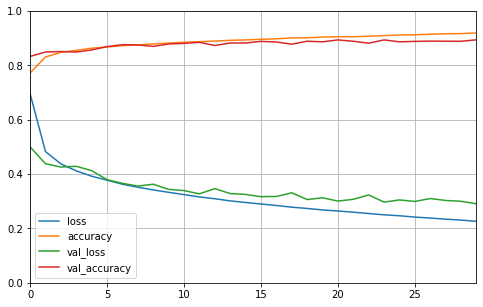

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
plt.show()

In [12]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 23us/sample - loss: 2.3079 - accuracy: 0.8545


[2.3079091154098483, 0.8545]

In [13]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
import numpy as np
y_pred = model.predict_classes(X_new)
print(y_pred)
np.array(class_names)[y_pred]
y_new = y_test[:3]
print(y_new)

[9 2 1]
[9 2 1]
